In [2]:
#本次的数据集是电影评论数据问题
import tensorflow as tf
from tensorflow import keras
from keras import layers


In [3]:
data=keras.datasets.imdb

In [10]:
(x_train,y_train),(x_test,y_test)=data.load_data(num_words=10000)

In [11]:
x_train.shape

(25000,)

In [12]:
#该题目是对一切单词建立一个数字索引，所以每个数据才会都是一个数字组成的序列
len(x_train[0])#设定之后整数最大值不会超过最大值

218

In [13]:
# data.get_word_index()

In [16]:
#使用k-hot编码，如果某个单词出现了就把该向量置为1
#或者使用将文本训练成密集向量
#keras中有embeling层可以将单词训练成密集向量
import numpy as np
res=[len(x) for x in x_train]
print(res[-3:])#我们通过这样发现每个评论长度不尽相同，为了对于数据更加标准化，我们要对数据进行处理

[184, 150, 153]


In [62]:
#利用keras来填充数据
x_train=keras.preprocessing.sequence.pad_sequences(x_train,256)
x_test=keras.preprocessing.sequence.pad_sequences(x_test,256)
res=[len(x) for x in x_train]
print(res[-3:])#
y_train[:10]#我们发现标签只是一个数字化的不用处理

[256, 256, 256]


array([1, 0, 0, 1, 0, 0, 1, 0, 1, 0], dtype=int64)

In [20]:
s="I am a student student"
list=s.split(' ')
label_names=np.unique(list)

In [22]:
label_names=dict((i,name) for i,name in enumerate(label_names))
label_names
#对于一串英文，我们可以这样来将数据编写为数字化

{0: 'I', 1: 'a', 2: 'am', 3: 'student'}

In [75]:
#利用keras处理序列化问题，之经典电影评论数据集
model = keras.Sequential()
model.add(keras.layers.Embedding(10000,16,input_length=256))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(256,activation=tf.nn.relu))
model.add(keras.layers.Dense(128,activation=tf.nn.relu))
model.add(keras.layers.Dense(1,activation=tf.nn.sigmoid))
model.summary()
#经过这一步，每一个单词都没映射为300乘50的向量

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, 256, 16)           160000    
_________________________________________________________________
flatten_6 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_31 (Dense)             (None, 256)               1048832   
_________________________________________________________________
dense_32 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_33 (Dense)             (None, 1)                 129       
Total params: 1,241,857
Trainable params: 1,241,857
Non-trainable params: 0
_________________________________________________________________


In [76]:
model.compile(optimizer='adam',
                    loss=keras.losses.BinaryCrossentropy(),
                    metrics=keras.metrics.Accuracy())
    

In [81]:
history=model.fit(x_train,y_train,epochs=30,validation_data=(x_test,y_test))

Epoch 1/30
782/782 [==============================] - 10s 13ms/step - loss: 1.9286e-07 - accuracy: 0.5056 - val_loss: 1.8982 - val_accuracy: 0.3333
Epoch 2/30
782/782 [==============================] - 11s 14ms/step - loss: 1.2588e-07 - accuracy: 0.5140 - val_loss: 1.9442 - val_accuracy: 0.3405
Epoch 3/30
782/782 [==============================] - 11s 14ms/step - loss: 8.2620e-08 - accuracy: 0.5222 - val_loss: 1.9905 - val_accuracy: 0.3475
Epoch 4/30
782/782 [==============================] - 11s 14ms/step - loss: 5.4659e-08 - accuracy: 0.5294 - val_loss: 2.0368 - val_accuracy: 0.3538
Epoch 5/30
782/782 [==============================] - 11s 14ms/step - loss: 3.6088e-08 - accuracy: 0.5354 - val_loss: 2.0832 - val_accuracy: 0.3592
Epoch 6/30
782/782 [==============================] - 11s 14ms/step - loss: 2.3923e-08 - accuracy: 0.5420 - val_loss: 2.1294 - val_accuracy: 0.3655
Epoch 7/30
782/782 [==============================] - 10s 13ms/step - loss: 1.5978e-08 - accuracy: 0.5484 - val_

In [82]:
#history保存运行结果为一个字典我们可以提取这个的训练的key值来观察我们的变化
#从而调整我们的数据集
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [90]:
model.fit(x_train,y_train,epochs=30)

Epoch 1/30
782/782 [==============================] - 10s 13ms/step - loss: 1.8360e-10 - accuracy: 0.6132
Epoch 2/30
782/782 [==============================] - 10s 13ms/step - loss: 1.6810e-10 - accuracy: 0.6142
Epoch 3/30
782/782 [==============================] - 10s 13ms/step - loss: 1.7913e-10 - accuracy: 0.6154
Epoch 4/30
782/782 [==============================] - 10s 13ms/step - loss: 1.6686e-10 - accuracy: 0.6160
Epoch 5/30
782/782 [==============================] - 9s 12ms/step - loss: 1.4570e-10 - accuracy: 0.6158
Epoch 6/30
760/782 [============================>.] - ETA: 0s - loss: 0.0172 - accuracy: 0.3557

KeyboardInterrupt: 

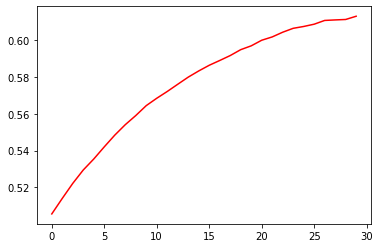

In [89]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history['accuracy'],'r')

In [92]:
model.predict(x_train[0])

ValueError: in user code:

    C:\Users\admin\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1478 predict_function  *
        return step_function(self, iterator)
    C:\Users\admin\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1468 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\admin\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\admin\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\admin\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\admin\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1461 run_step  **
        outputs = model.predict_step(data)
    C:\Users\admin\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1434 predict_step
        return self(x, training=False)
    C:\Users\admin\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:1012 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    C:\Users\admin\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:375 call
        return super(Sequential, self).call(inputs, training=training, mask=mask)
    C:\Users\admin\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\functional.py:425 call
        inputs, training=training, mask=mask)
    C:\Users\admin\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\functional.py:560 _run_internal_graph
        outputs = node.layer(*args, **kwargs)
    C:\Users\admin\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    C:\Users\admin\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:259 assert_input_compatibility
        ' but received input with shape ' + display_shape(x.shape))

    ValueError: Input 0 of layer dense_31 is incompatible with the layer: expected axis -1 of input shape to have value 4096 but received input with shape (32, 16)
